<h3 align = 'center'><font color='#28abe3'>Kaggle Competition: Predicting Red Hat Business Value</font></h3>

#### Introduction:

"This competition uses two separate data files that may be joined together to create a single, unified data table: a people file and an activity file.

The people file contains all of the unique people (and the corresponding characteristics) that have performed activities over time. Each row in the people file represents a unique person. Each person has a unique people_id.

The activity file contains all of the unique activities (and the corresponding activity characteristics) that each person has performed over time. Each row in the activity file represents a unique activity performed by a person on a certain date. Each activity has a unique activity_id.

The challenge of this competition is to predict the potential business value of a person who has performed a specific activity. The business value outcome is defined by a yes/no field attached to each unique activity in the activity file. The outcome field indicates whether or not each person has completed the outcome within a fixed window of time after each unique activity was performed.

The activity file contains several different categories of activities. Type 1 activities are different from type 2-7 activities because there are more known characteristics associated with type 1 activities (nine in total) than type 2-7 activities (which have only one associated characteristic)."

Okay so first things first, it'll be good practice to do the join through sqlite instead of pandas so lets build an sqlite database for this.

In [5]:
import sqlite3
import pandas as pd
import csv
import os
#set working directory equal to current directory
currentDirectory = os.getcwd()
os.chdir(currentDirectory)

#import data
peopleData = pd.read_csv('people.csv')
peopleData.fillna('--')
peopleData = list(peopleData.values)
act_train = pd.read_csv('act_train.csv')
act_train.fillna('--')
act_train.insert(0, id, list(range(0,len(act_train))))
act_train = list(act_train.values)
#create sqlite database
db = sqlite3.connect('RedHatDB.db')
cursor = db.cursor()

In [6]:
#create tables
cursor.execute('CREATE TABLE IF NOT EXISTS act_train(id INT PRIMARY KEY,people_id TEXT FOERIGN KEY, activity_id TEXT,date TEXT,activity_category TEXT,char_1 TEXT,char_2 TEXT,char_3 TEXT,char_4 TEXT,char_5 TEXT,char_6 TEXT,char_7 TEXT,char_8 TEXT,char_9 TEXT,char_10 TEXT,outcome INT)')
cursor.execute('CREATE TABLE IF NOT EXISTS people(people_id TEXT PRIMARY KEY,char_1 TEXT,group_1 TEXT,char_2 TEXT,date TEXT,char_3 TEXT,char_4 TEXT,char_5 TEXT,char_6 TEXT,char_7 TEXT,char_8 TEXT,char_9 TEXT,char_10 TEXT,char_11 TEXT,char_12 TEXT,char_13 TEXT,char_14 TEXT,char_15 TEXT,char_16 TEXT,char_17 TEXT,char_18 TEXT,char_19 TEXT,char_20 TEXT,char_21 TEXT,char_22 TEXT,char_23 TEXT,char_24 TEXT,char_25 TEXT,char_26 TEXT,char_27 TEXT,char_28 TEXT,char_29 TEXT,char_30 TEXT,char_31 TEXT,char_32 TEXT,char_33 TEXT,char_34 TEXT,char_35 TEXT,char_36 TEXT,char_37 TEXT,char_38 TEXT)')


In [7]:
#Populate tables
cursor.executemany('INSERT INTO people(people_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38) VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)',
              peopleData)
cursor.executemany('INSERT INTO act_train(id,people_id, activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,outcome) VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)',
                  act_train)
#close connection
db.commit()
db.close()

In [2]:
import sqlite3

#join the tables
db = sqlite3.connect('RedHatDB.db')
cursor = db.cursor()

cursor.execute('SELECT * FROM people INNER JOIN act_train ON people.people_id = act_train.people_id')
z = cursor.fetchall()

In [3]:
import pandas as pd
trainData = pd.DataFrame(z)

The majority of the data is missing predictors for columns 46 through 54. The columns that arent missing those points are all missing 55 however. We can try filling in those predictions with their predicted values. Something to keep in the idea bank. Another big feature of this data is that nearly every predictor is categorical, a big pain.

First things first, lets do some data exploration.

In [4]:
act_train = pd.read_csv('act_train.csv')
peopleData = pd.read_csv('people.csv')
trainData = trainData.drop(41,1)
# get the names back in there
trainData = trainData.drop(1,1)
trainData.columns = list(peopleData.columns[1:] ) + list(act_train.columns)


In [33]:
trainData.columns


Index(['people_id', 'char_1', 'group_1', 'char_2', 'date', 'char_3', 'char_4',
       'char_5', 'char_6', 'char_7', 'char_8', 'char_9', 'char_10', 'char_11',
       'char_12', 'char_13', 'char_14', 'char_15', 'char_16', 'char_17',
       'char_18', 'char_19', 'char_20', 'char_21', 'char_22', 'char_23',
       'char_24', 'char_25', 'char_26', 'char_27', 'char_28', 'char_29',
       'char_30', 'char_31', 'char_32', 'char_33', 'char_34', 'char_35',
       'char_36', 'char_37', 'char_38', 'people_id', 'activity_id', 'date',
       'activity_category', 'char_1', 'char_2', 'char_3', 'char_4', 'char_5',
       'char_6', 'char_7', 'char_8', 'char_9', 'char_10', 'outcome'],
      dtype='object')

In [34]:
trainData[:10]

,people_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,...,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,outcome
0,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,...,None,None,None,None,None,None,None,None,type 76,0
1,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,...,None,None,None,None,None,None,None,None,type 1,0
2,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,...,None,None,None,None,None,None,None,None,type 1,0
3,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,...,None,None,None,None,None,None,None,None,type 1,0
4,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,...,None,None,None,None,None,None,None,None,type 1,0
5,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,...,None,None,None,None,None,None,None,None,type 1727,0
6,ppl_100002,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,type 11,...,None,None,None,None,None,None,None,None,type 1,1
7,ppl_100002,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,type 11,...,None,None,None,None,None,None,None,None,type 1,1
8,ppl_100003,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,type 5,...,None,None,None,None,None,None,None,None,type 1,1
9,ppl_100003,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,type 5,...,None,None,None,None,None,None,None,None,type 1,1


So we have a bunch of 'char_x' data, a group_1, their people id, their activity id, the category of the activity and then a bunch more 'char' data as it pertains to the activity rather than the person. Lets start by looking at the people data.

Activity category should be a good one. Lets take a look at the different category frequencies

([<matplotlib.axis.XTick at 0x1eba72b70>,
 <a list of 7 Text xticklabel objects>)

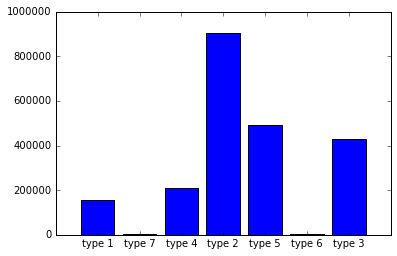

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
import collections
x = collections.Counter(list(trainData['activity_category'].values))
l = range(len(x.keys()))
plt.bar(l, x.values(), align='center')
plt.xticks(l, x.keys())

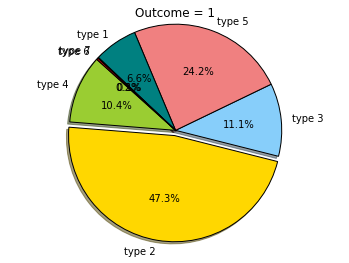

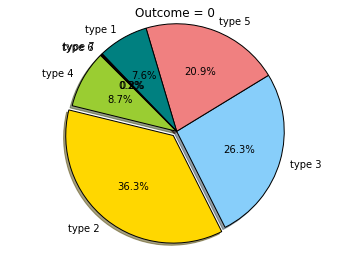

In [6]:
freq = []
labels = []
for i in trainData['activity_category'].unique():
    occur = trainData[trainData['outcome'] == 1 ]
    hits = occur[occur['activity_category'] == i]
    freq.append(len(hits)/len(occur))
    labels.append(i)

xplode = [0,.05,0,0,0,0,0]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','teal','silver','red']
plt.pie(freq, labels=labels,explode = xplode,shadow=True,colors = colors, startangle=138,autopct='%1.1f%%')
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.title('Outcome = 1')
fig = plt.figure()

freq = []
labels = []
for i in trainData['activity_category'].unique():
    occur = trainData[trainData['outcome'] == 0 ]
    hits = occur[occur['activity_category'] == i]
    freq.append(len(hits)/len(occur))
    labels.append(i)

xplode = [0,.05,0,0,0,0,0]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','teal','silver','red']
plt.pie(freq, labels=labels,explode = xplode,shadow=True,colors = colors, startangle=135,autopct='%1.1f%%')
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.title('Outcome = 0')
fig = plt.figure()


Okay nothing super insightful, I feel like going through each of the char types is too big of a task so lets focus on the people. Lets try and see how much of our data is composed of heavy users.

In [108]:
trainData = trainData.drop(trainData.columns[1],axis=1,inplace=True)


In [7]:
print(len(trainData['people_id']))
print(len(trainData['people_id'].unique()))

2197291
151295


In [8]:
#how much of the data is composed of say the top 10 people_ids?
x = collections.Counter(list(trainData['people_id'].values))

In [37]:
print( sum(sorted(x.values())[len(x.values())-10:])/len(trainData) * 100 )

9.10794246187692


So around 9% of the data is generated from the heaviest useres. Lets take a look at these users to see if there are some obvious trends I can pick up on.

In [156]:
heavyUsers = [list(x.values()),list(x.keys())]

20
21
22
23


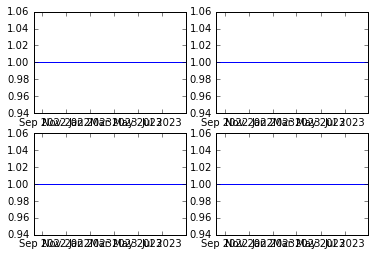

In [190]:

plt.figure(1)
for i in list(range(20,24)):
    print(i)
    user = trainData['people_id'].values[i]
    activity = act_train[act_train['people_id'] == user]
    import datetime
    dates = []
    for j in list(range(0,len(activity))):
        t = datetime.datetime.strptime(list(activity['date'].values)[j], '%Y-%m-%d')
        dates.append(t)
    plt.subplot(2,2,i-19)
    plt.plot(dates,list(activity['outcome'].values[0:len(activity)]))
plt.show()

So users have almost 'signal' like behavior, for bursts their activity is on and for bursts its off so we can even think of this as true time series data for each user. There are a lot of different things to think about here. We have potentially multiple ways to break the model into smaller parts. One part considers the behaviour of a user, one which looks at the features of an action and so on.